# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Dementia](img/ml.png)

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| EDGARD GUILHERME OLIVEIRA YAMASHITA             | RM 330433       | `1IA` |
| GUSTAVO FALCÃO ZAMBERLAN             | RM 330475      | `1IA` |
| REGIS FONTINELO SPINDOLA             | RM 330397      | `1IA` |
| THIAGO LUQUE BAENA             | RM 330620      | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos e, até mesmo, trechos de código-fonte.

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

O dataset oroginal "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.

__Atualizado em 16/07/2017__

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
dados = pd.read_csv("https://github.com/michelpf/fiap-ml-prog-ia-python/raw/master/projeto-final/data/automobile-mod.csv", sep=';')

dados.head(10)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

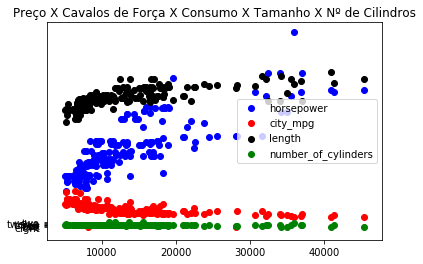

In [3]:
plt.scatter(x=dados["price"], 
            y=dados["horsepower"], c='blue')

plt.scatter(x=dados["price"], 
            y=dados["city_mpg"], c='red')


plt.scatter(x=dados["price"], 
            y=dados["length"], c='black')

plt.scatter(x=dados["price"], 
            y=dados["number_of_cylinders"], c='green')


plt.legend()
plt.title("Preço X Cavalos de Força X Consumo X Tamanho X Nº de Cilindros")
plt.show()


**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**

Usando a variação do preço para 4 variaveis (cavalo de força / consumo na cidade / tamanho / número de cilindros), pelo gráfico acima fica claro que a melhor variavel para análise do preço são os cavalos de força

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

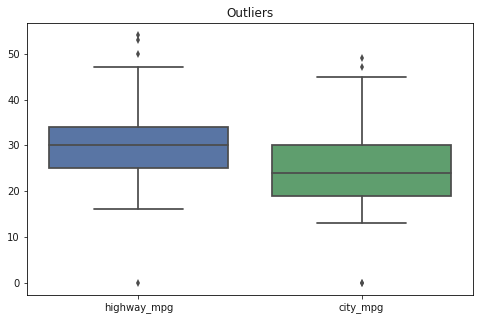

In [4]:
#IMPLEMENTAÇÃO
#dados.describe()
plt.rcParams['figure.figsize'] = (8,5)
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=dados, order=["highway_mpg","city_mpg"])

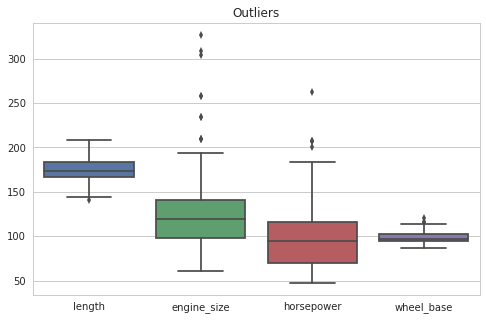

In [5]:
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=dados, order=["length","engine_size","horsepower","wheel_base"])
#sns.swarmplot(data=dados, order=["length","engine_size","horsepower","wheel_base"],color=".25")

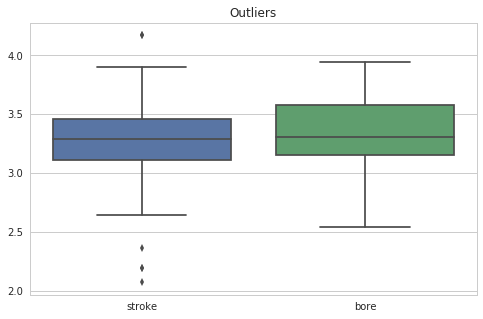

In [51]:
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=dados, order=["stroke","bore"])

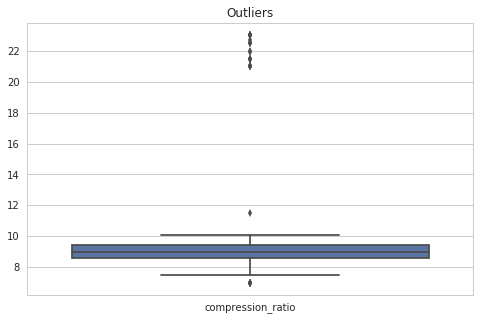

In [7]:
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=dados, order=["compression_ratio"])

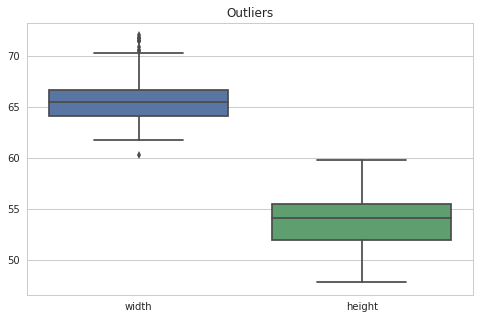

In [8]:
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=dados, order=["width","height"])

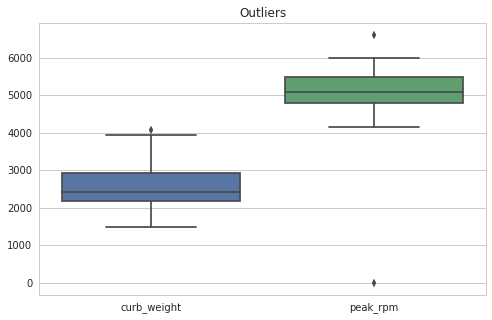

In [9]:
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=dados, order=["curb_weight","peak_rpm"])

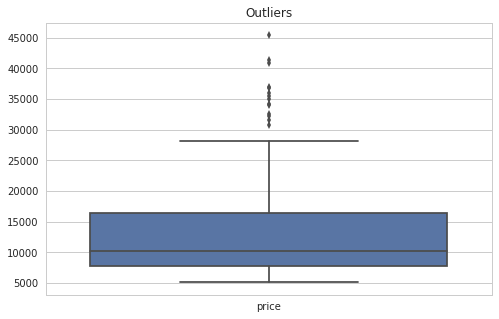

In [10]:
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=dados[["price"]])

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [11]:
dados.isnull().sum()[lambda x: x> 0]

peak_rpm       2
city_mpg       1
highway_mpg    1
dtype: int64

In [12]:
#Visualizando todos os casos nulos
dados[(dados.peak_rpm.isnull()) | (dados.city_mpg.isnull()) | (dados.highway_mpg.isnull())]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,...,108,2bbl,3.62,2.64,8.7,73,NaN,26.0,31.0,7603
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,10.0,100,NaN,26.0,32.0,9995


Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

In [13]:
#Para os casos de peak_rpm nulo, validar quais sao os valores para os demais veiculos 4wd
dados[(dados.peak_rpm.isnull()) | (dados.drive_wheels == '4wd')]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,...,108,2bbl,3.62,2.64,8.7,73,NaN,26.0,31.0,7603
140,subaru,gas,std,four,sedan,4wd,front,97.0,172.0,65.4,...,108,2bbl,3.62,2.64,9.0,82,4800.0,24.0,25.0,9233
141,subaru,gas,turbo,four,sedan,4wd,front,97.0,172.0,65.4,...,108,mpfi,3.62,2.64,7.7,111,4800.0,24.0,29.0,11259
144,subaru,gas,std,four,wagon,4wd,front,96.9,173.6,65.4,...,108,2bbl,3.62,2.64,9.0,82,4800.0,23.0,29.0,8013
145,subaru,gas,turbo,four,wagon,4wd,front,96.9,173.6,65.4,...,108,mpfi,3.62,2.64,7.7,111,4800.0,23.0,23.0,11694
150,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,...,92,2bbl,3.05,3.03,9.0,62,4800.0,27.0,32.0,7898
151,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,...,92,2bbl,3.05,3.03,9.0,62,4800.0,27.0,32.0,8778
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,10.0,100,NaN,26.0,32.0,9995


In [14]:
#substituindo o peak_rpm por 4800 por estar proximo com os demais
dados.loc[dados["peak_rpm"].isnull(), "peak_rpm"] = 4800

In [15]:
dados[(dados.city_mpg.isnull()) | (dados.horsepower == 76)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,92,1bbl,2.91,3.41,9.2,76,6000.0,31.0,38.0,6855
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7129
34,honda,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7295
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,0.0,30.0,34.0,7295
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895


In [16]:
#substituindo o city_mpg por 30 por estar proximo com os demais
dados.loc[dados["city_mpg"].isnull(), "city_mpg"] = 30
#substituindo o highway_mpg por 34 por estar proximo com os demais
dados.loc[dados["highway_mpg"].isnull(), "highway_mpg"] = 34

### Análise de valores com valores iguais a 0

In [17]:
dados.loc[(dados==0).any(1)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,34.0,6529
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,0.0,30.0,34.0,7295
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,0.0,25.0,28176
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,0.0,31600
181,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,9.0,85,5250.0,0.0,34.0,8195


Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [18]:
dados[(dados.peak_rpm == 0) | (dados.horsepower == 76)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,92,1bbl,2.91,3.41,9.2,76,6000.0,31.0,38.0,6855
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,34.0,6529
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7129
34,honda,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7295
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,0.0,30.0,34.0,7295


In [19]:
dados[(dados.city_mpg == 0) | (dados.peak_rpm == 4350.0) | (dados.peak_rpm == 5250.0)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
64,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.50,123,4350.0,22.0,25.0,25552
65,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.50,123,4350.0,22.0,25.0,28248
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.50,123,4350.0,0.0,25.0,28176
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.50,123,4350.0,22.0,0.0,31600
128,saab,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,...,121,mpfi,3.54,3.07,9.31,110,5250.0,21.0,28.0,11850
129,saab,gas,std,four,sedan,fwd,front,99.1,186.6,66.5,...,121,mpfi,3.54,3.07,9.30,110,5250.0,21.0,28.0,12170
130,saab,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,...,121,mpfi,2.54,2.07,9.30,110,5250.0,21.0,28.0,15040
131,saab,gas,std,four,sedan,fwd,front,99.1,186.6,66.5,...,121,mpfi,3.54,3.07,9.30,110,5250.0,21.0,28.0,15510
179,volkswagen,gas,std,two,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,9.00,85,5250.0,27.0,34.0,7975
181,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,9.00,85,5250.0,0.0,34.0,8195


A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

In [20]:
#Todos os casos de horsepower 76 tem o peak_rpm 6000, logo para os casos zerados utilizares 6000
dados.loc[dados["peak_rpm"] == 0, "peak_rpm"] = 6000
#Os casos de 25 highway_mpg tem como padrão 22 city_mpg
dados.loc[(dados["city_mpg"] == 0) & (dados["peak_rpm"] == 4350.0), "city_mpg"] = 22
dados.loc[(dados["highway_mpg"] == 0) & (dados["peak_rpm"] == 4350.0), "highway_mpg"] = 25

#Os casos de peak_rpm 5250 tem city_mpg padrao de 27
dados.loc[(dados["city_mpg"] == 0) & (dados["peak_rpm"] == 5250.0), "city_mpg"] = 27



### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [21]:
def identificacao_outlier(df, column_name): 
    print("---------------------------------")
    print("Coluna: "+column_name)
    print("Q1: "+str(np.percentile(df[column_name], 25)))
    print("Q3: "+str(np.percentile(df[column_name], 75)))
    print("Min: "+str(np.min(df[column_name])))
    print("Max: "+str(np.max(df[column_name])))
    passo = (np.percentile(df[column_name], 75) - np.percentile(df[column_name], 25))*5
    print("Passo: "+str(passo))
    outlier_lower = df[(df[column_name] < np.percentile(df[column_name], 25)-passo)]
    outlier_upper = df[(df[column_name] > np.percentile(df[column_name], 75)+passo)]
    #IMPLEMENTAÇÃO
    if len(outlier_lower) > 0:
        print("Outliers Lower")
        print(outlier_lower)
    if len(outlier_upper) > 0:
        print("Outliers Upper")
        print(outlier_upper)
    if len(outlier_upper) == 0 & len(outlier_upper) == 0:
        print("--------- Sem outliers-----------")
    

In [22]:
identificacao_outlier(dados, "wheel_base")
identificacao_outlier(dados, "length")
identificacao_outlier(dados, "width")
identificacao_outlier(dados, "height")
identificacao_outlier(dados, "curb_weight")
identificacao_outlier(dados, "engine_size")
identificacao_outlier(dados, "bore")
identificacao_outlier(dados, "stroke")
identificacao_outlier(dados, "compression_ratio")
identificacao_outlier(dados, "horsepower")
identificacao_outlier(dados, "peak_rpm")
identificacao_outlier(dados, "city_mpg")
identificacao_outlier(dados, "highway_mpg")
identificacao_outlier(dados, "price")

---------------------------------
Coluna: wheel_base
Q1: 94.5
Q3: 102.4
Min: 86.6
Max: 120.9
Passo: 39.50000000000003
--------- Sem outliers-----------
---------------------------------
Coluna: length
Q1: 166.8
Q3: 183.5
Min: 141.1
Max: 208.1
Passo: 83.49999999999994
--------- Sem outliers-----------
---------------------------------
Coluna: width
Q1: 64.1
Q3: 66.6
Min: 60.3
Max: 72.0
Passo: 12.5
--------- Sem outliers-----------
---------------------------------
Coluna: height
Q1: 52.0
Q3: 55.5
Min: 47.8
Max: 59.8
Passo: 17.5
--------- Sem outliers-----------
---------------------------------
Coluna: curb_weight
Q1: 2169.0
Q3: 2926.0
Min: 1488
Max: 4066
Passo: 3785.0
--------- Sem outliers-----------
---------------------------------
Coluna: engine_size
Q1: 98.0
Q3: 141.0
Min: 61
Max: 326
Passo: 215.0
--------- Sem outliers-----------
---------------------------------
Coluna: bore
Q1: 3.15
Q3: 3.58
Min: 2.54
Max: 3.94
Passo: 2.150000000000001
--------- Sem outliers-----------
--------

In [23]:
dados[(dados.fuel_type == "diesel")]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
60,mazda,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,...,122,idi,3.39,3.39,22.7,64,4650.0,36.0,42.0,10795
63,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,...,134,idi,3.43,3.64,22.0,72,4200.0,31.0,39.0,18344
64,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,25552
65,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,28248
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,28176
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,31600
87,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,103,idi,2.99,3.47,21.9,55,4800.0,45.0,50.0,7099
105,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,152,idi,3.70,3.52,21.0,95,4150.0,28.0,33.0,13200
107,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,...,152,idi,3.70,3.52,21.0,95,4150.0,25.0,25.0,13860
109,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,152,idi,3.70,3.52,21.0,95,4150.0,28.0,33.0,16900


**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:**
Sim, houveram dados discrepantes para a taxa de compressão. Esses dados devem ser mantidos porque são veículos movidos à diesel e é uma característica de motores a diesel ter uma taxa de compressão maior que os demais combustíveis.

### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [24]:
def mapear_serie(serie):
    return dict([[v,k] for k,v in dict(enumerate(serie.unique())).items()])

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [25]:
dictMake = mapear_serie(dados.make)
dictFuel = mapear_serie(dados.fuel_type)
dictAspiration = mapear_serie(dados.aspiration)
dictDoors = mapear_serie(dados.number_of_doors)
dictBodystyle = mapear_serie(dados.body_style)
dictDriveWheels = mapear_serie(dados.drive_wheels)
dictEngineLocation = mapear_serie(dados.engine_location)
dictFuelSystem = mapear_serie(dados.fuel_system)
dictEngineType = mapear_serie(dados.engine_type)
dictNumCilinders = mapear_serie(dados.number_of_cylinders)

Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [26]:

dados_dict = dados.assign(num_make = list(map(lambda x: dictMake.get(x), dados.make)))
dados_dict = dados_dict.drop('make',1)

dados_dict = dados_dict.assign(num_fuel_type = list(map(lambda x: dictFuel.get(x), dados.fuel_type)))
dados_dict = dados_dict.drop('fuel_type',1)

dados_dict = dados_dict.assign(num_aspiration = list(map(lambda x: dictAspiration.get(x), dados.aspiration)))
dados_dict = dados_dict.drop('aspiration',1)

dados_dict = dados_dict.assign(num_number_of_doors = list(map(lambda x: dictDoors.get(x), dados.number_of_doors)))
dados_dict = dados_dict.drop('number_of_doors',1)

dados_dict = dados_dict.assign(num_body_style = list(map(lambda x: dictBodystyle.get(x), dados.body_style)))
dados_dict = dados_dict.drop('body_style',1)

dados_dict = dados_dict.assign(num_drive_wheels = list(map(lambda x: dictDriveWheels.get(x), dados.drive_wheels)))
dados_dict = dados_dict.drop('drive_wheels',1)

dados_dict = dados_dict.assign(num_engine_location = list(map(lambda x: dictEngineLocation.get(x), dados.engine_location)))
dados_dict = dados_dict.drop('engine_location',1)

dados_dict = dados_dict.assign(num_fuel_system = list(map(lambda x: dictFuelSystem.get(x), dados.fuel_system)))
dados_dict = dados_dict.drop('fuel_system',1)

dados_dict = dados_dict.assign(num_engine_type = list(map(lambda x: dictEngineType.get(x), dados.engine_type)))
dados_dict = dados_dict.drop('engine_type',1)

dados_dict = dados_dict.assign(num_number_of_cylinders = list(map(lambda x: dictNumCilinders.get(x), dados.number_of_cylinders)))
dados_dict = dados_dict.drop('number_of_cylinders',1)

dados_dict.head(20)


,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,...,num_make,num_fuel_type,num_aspiration,num_number_of_doors,num_body_style,num_drive_wheels,num_engine_location,num_fuel_system,num_engine_type,num_number_of_cylinders
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,1,0,0,0,1,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,1,0,0,1,2,1,0,0,2,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,1,0,0,1,2,2,0,0,2,2
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,1,0,0,0,2,1,0,0,2,2
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,...,1,0,0,1,2,1,0,0,2,2
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,...,1,0,0,1,3,1,0,0,2,2
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,...,1,0,1,1,2,1,0,0,2,2
9,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,...,2,0,0,0,2,0,0,0,2,0


## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:**
### Regressão Linear:
Analisa a correlação de um dado x (variável dependente) em função de uma variável y (variável independente), é utilizada para predizer valores de x conforme a variação da variável y. Geralmente é representada por uma reta sobre um diagrama de dispersão. Caso esta reta seja horizontal (paralela ao eixo x, diz-se que não existe correlação entre as variáveis. Caso a reta seja inclinada para cima ( o lado mais à direita do gráfico esteja numa posição superior ao lado esquerdo - quanto mais à direito maior o valor de y ) diz-se que existe uma relação linear positiva entre x e y e caso ela se incline pra baixo, diz-se que existe uma relação linear negativa entre as variáveis. Caso sejam utilizadas mais de uma variável y para determinar o valor de x, é chamada de regressão linear múltipla. Exemplo de uso: Predizer o valor de imóveis em função da sua localização, tamanho, idade, qtde de suítes e outros atributos. Predizer o tempo de percurso de um trajeto em função da distância, da localização de partida e chegada, do horário que irá realizar o percurso.

### Arvore de Decisão
Arvore de decisão são fluxos a ser percorridos que variam de acordo com cada decisão (ou resposta) a cada nó da árvore até chegar à um nó final onde se tem a decisão a ser tomada ou a uma predição. No caso da conclusão ser uma predição, os nós representam dados (características) do que está sendo analisado. Exemplo de uso: Chatbot de atendimento

### Regressão Ridge
É um método de regularização do modelo que tem o objetivo de suavizar na base de treinamento algumas variáveis que são altamente correlacionadas entre si, deixando apenas uma dela como relevante. É utilizado um mecanismo de penalização que coloca um viés e vai reduzindo os valores Beta até próximos de zero, tornando-se irrelevantes para o modelo. Exemplo de uso: onde existe um grande número de variáveis; onde existe uma relação baixa de observações numéricas para número de variáveis; onde existe alta Multicolinearidade (variáveis independentes possuem relações lineares exatas ou aproximadamente exatas).

Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e qual seria o atributo preditor?

In [27]:
#Sugestão.. predizer preço pelos cavalos de força / fabricante / numero de portas e peso total de um veículo 
# num_make: fabricante
# num_fuel_type: tipo de combustível
# num_aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
# num_body_style: estilo do carro, ex. sedan ou hatchback
# num_drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
# number_of_cylinders: cilindrada, quantidade de cilindros
# horsepower: cavalo de força ou HP
# city_mpg: consumo em mpg (milhas por galão) na cidade

feature_col_names = ['horsepower', 'num_make', 'num_fuel_type','num_aspiration','num_body_style','num_drive_wheels','num_number_of_cylinders']
predicted_class_names = ['price']


Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [28]:
from sklearn.model_selection import train_test_split

X = dados_dict[feature_col_names].values
y = dados_dict[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [29]:
#IMPLEMENTAÇÃO
#Inspeção de X_train
X_train

array([[ 97,  12,   0,   0,   2,   1,   0],
       [ 60,   5,   0,   0,   1,   1,   0],
       [121,   2,   0,   0,   2,   0,   1],
       [ 76,   5,   0,   0,   3,   1,   0],
       [ 68,  14,   0,   0,   2,   1,   0],
       [ 78,   6,   0,   0,   2,   0,   0],
       [114,  21,   0,   0,   2,   0,   0],
       [ 69,  12,   0,   0,   3,   1,   0],
       [ 73,  18,   0,   0,   1,   2,   0],
       [ 68,   8,   0,   0,   2,   1,   0],
       [ 90,  16,   0,   0,   1,   1,   0],
       [112,  19,   0,   0,   1,   0,   0],
       [100,   5,   0,   0,   2,   1,   0],
       [ 68,  14,   0,   0,   2,   1,   0],
       [ 95,  13,   1,   1,   2,   0,   0],
       [102,   4,   0,   1,   2,   1,   0],
       [ 94,  18,   0,   0,   2,   1,   0],
       [152,  12,   0,   0,   2,   1,   1],
       [ 95,  13,   1,   1,   3,   0,   0],
       [154,   0,   0,   0,   1,   0,   1],
       [116,  11,   0,   1,   1,   1,   0],
       [262,   7,   0,   0,   2,   0,   4],
       [162,  21,   0,   1,   2,

In [30]:
#IMPLEMENTAÇÃO
#Inspeção de Y_train
y_train


array([[ 9549],
       [ 5399],
       [21105],
       [ 7295],
       [ 7609],
       [ 6785],
       [12940],
       [ 7349],
       [ 7603],
       [ 7395],
       [ 9895],
       [ 9538],
       [10345],
       [ 6692],
       [17950],
       [ 8558],
       [ 9960],
       [13499],
       [17075],
       [16500],
       [ 9959],
       [36000],
       [18420],
       [15985],
       [ 9279],
       [ 9298],
       [ 7895],
       [13415],
       [11245],
       [ 7957],
       [11259],
       [17199],
       [ 7129],
       [20970],
       [18950],
       [ 8058],
       [17710],
       [ 8921],
       [ 8921],
       [17450],
       [ 6529],
       [ 7463],
       [11694],
       [16900],
       [ 8013],
       [16925],
       [18280],
       [16630],
       [ 5348],
       [11199],
       [13495],
       [ 7995],
       [ 7198],
       [40960],
       [32528],
       [25552],
       [32250],
       [ 8449],
       [12964],
       [12945],
       [15580],
       [ 7788],
       [

Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divia o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [31]:
#IMPLEMENTAÇÃO

print("{0:0.2f}% nos dados de treinamento".format((len(X_train)/len(dados_dict.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_test)/len(dados_dict.index)) * 100))

69.65% nos dados de treinamento
30.35% nos dados de teste


## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [33]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel())



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [34]:
pontuacao(lr_model, X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) R2 score: 0.80


### Regressão de árvore de Decisão

In [52]:
from sklearn import tree

dtr_model = tree.DecisionTreeRegressor()
dtr_model.fit(X_train, y_train.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [53]:
pontuacao(dtr_model, X_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') R2 score: 0.74


### Regressão Ridge

In [54]:
lrr_model = linear_model.Ridge()
lrr_model.fit(X_train, y_train.ravel())

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [55]:
pontuacao(lrr_model, X_test, y_test)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2 score: 0.79


**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:** Se analisarmos apenas o R2 podemos dizer que a regressão linear teve o melhor resultado, pois teve o R2 mais alto, como a regressão avalia o quanto a variação do valor de uma variável influencia no valor da preditiva o fato de pegarmos variaveis com boa correlação fez um modelo com um bom resultado, a regressão de ridge está bem próxima da linear até porque a ideia é parecida, mesmo anulando alguma variável a previsão para alguns casos pode ter sido um pouco menor, para a árvore de decisão possíveis transformações nas variáveis podem ajudar o modelo a encontrar mais similaridades nos registros e assim gerar galhos com boas condições.

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [39]:
from sklearn.model_selection import GridSearchCV
        
parameters = { "n_jobs": [1,10,50,100,200,300,500,1000], "normalize": [False,True], "fit_intercept": [False,True], "copy_X": [False,True] }
opt_model_lr = GridSearchCV(lr_model, parameters, scoring='r2')
opt_model_lr.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'normalize': [False, True], 'fit_intercept': [False, True], 'n_jobs': [1, 10, 50, 100, 200, 300, 500, 1000], 'copy_X': [False, True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Calcule as pontuações para o melhor estimador com dados de treino.

In [40]:
opt_model_lr.score(X_train, y_train.ravel()), opt_model_lr.best_estimator_

(0.7849419602832024,
 LinearRegression(copy_X=False, fit_intercept=False, n_jobs=1, normalize=False))

E também para os dados de testes.

In [41]:
opt_model_lr.score(X_test, y_test.ravel()), opt_model_lr.best_estimator_

(0.7906226272255722,
 LinearRegression(copy_X=False, fit_intercept=False, n_jobs=1, normalize=False))

### Regulação do Modelo de Regressão de Árvore de Decisão

In [42]:
parameters = {"criterion":['mse','friedman_mse','mae'], "max_depth":[None], 
             "max_features":['auto','sqrt','log2'],
           "max_leaf_nodes":[None], "min_impurity_decrease":[0.0],
           "min_impurity_split":[None], "min_samples_leaf":[1],
           "min_samples_split":[2], "min_weight_fraction_leaf":[0.0],
           "presort":[False], "random_state":[5,None], "splitter":['best','random']}

opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2')
opt_model_dtr.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'presort': [False], 'splitter': ['best', 'random'], 'min_impurity_decrease': [0.0], 'criterion': ['mse', 'friedman_mse', 'mae'], 'min_samples_split': [2], 'min_impurity_split': [None], 'random_state': [5, None], 'max_features': ['auto', 'sqrt', 'log2'], 'min_weight_fraction_leaf': [0.0], 'max_depth': [None], 'min_samples_leaf': [1], 'max_leaf_nodes': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [43]:
opt_model_dtr.score(X_train, y_train.ravel()), opt_model_dtr.best_estimator_

(0.989796513785579,
 DecisionTreeRegressor(criterion='mae', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random'))

Pontuação dos dados de teste.

In [44]:
opt_model_dtr.score(X_test, y_test.ravel()), opt_model_dtr.best_estimator_

(0.7354537817329522,
 DecisionTreeRegressor(criterion='mae', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random'))

### Regulação do Modelo de Regressão Ridge

In [45]:
parameters = {"alpha": [1.0,2.0,3.0], "fit_intercept": [False,True],
             "copy_X": [False,True], "max_iter": [None],
             "normalize": [False,True], "random_state": [1,5,18,45,None], "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"], 
              "tol": [1]}

opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [None], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 'fit_intercept': [False, True], 'alpha': [1.0, 2.0, 3.0], 'normalize': [False, True], 'random_state': [1, 5, 18, 45, None], 'tol': [1], 'copy_X': [False, True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [46]:
opt_model_lrr.score(X_train, y_train.ravel()), opt_model_lrr.best_estimator_

(0.7845925303539834,
 Ridge(alpha=1.0, copy_X=False, fit_intercept=False, max_iter=None,
    normalize=False, random_state=1, solver='svd', tol=1))

Pontuação dos dados de teste.

In [47]:
opt_model_lrr.score(X_test, y_test.ravel()), opt_model_lrr.best_estimator_

(0.7872892942266931,
 Ridge(alpha=1.0, copy_X=False, fit_intercept=False, max_iter=None,
    normalize=False, random_state=1, solver='svd', tol=1))

Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

|                     | Regressão linear | Regressão árvore de decisão | Regressão ridge |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| R2 treino |      0.7849           |      0.9907                       |   0.7845              |
| R2 teste  |      0.7906           |      0.8844                       |   0.7872              |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:** O algoritimo de arvore de decisão. O fato de cada caracteristica ser avaliada individualmente e seguir determinado fluxo conforme a avaliação de cada uma delas. Como as variáveis preditoras já foram escolhidas de forma pensada, diversas regulações do modelo Ridge resultaram no mesmo escore do modelo.

Arvore de decisão

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [48]:
dtr_model_opt = tree.DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
dtr_model_opt.fit(X_train, y_train.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='log2',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [49]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names

feature_col_names

['horsepower',
 'num_make',
 'num_fuel_type',
 'num_aspiration',
 'num_body_style',
 'num_drive_wheels',
 'num_number_of_cylinders']

In [50]:
#IMPLEMENTAÇÃO
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma 
#matriz dentro de outra matriz [[a,b,c,d,e]]
#dtr_model_opt.predict(

#Carro da chevolet
exemplo_vec_barato = dados_dict[dados_dict.num_make == 3].sample(1)
#Carro toyota
exemplo_vec_medio = dados_dict[dados_dict.num_make == 19].sample(1)
#Carro audi
exemplo_vec_caro = dados_dict[dados_dict.num_make == 1].sample(1)

dtr_model_opt.predict(exemplo_vec_caro[feature_col_names].values)

print("Carro Barato - Valor Real {0} - Valor Predito {1}".format(exemplo_vec_barato["price"].iloc[0], dtr_model_opt.predict(exemplo_vec_barato[feature_col_names].values)))
print("Carro Medio - Valor Real {0} - Valor Predito {1}".format(exemplo_vec_medio["price"].iloc[0], dtr_model_opt.predict(exemplo_vec_medio[feature_col_names].values)))
print("Carro Caro - Valor Real {0} - Valor Predito {1}".format(exemplo_vec_caro["price"].iloc[0], dtr_model_opt.predict(exemplo_vec_caro[feature_col_names].values)))

#test_example_1 = [[]]
#test_example_2 = [[]]
#test_example_3 = [[]]

#Carro Barato - Valor Real 5151 - Valor Predito [5275.]
#Carro Medio - Valor Real 7898 - Valor Predito [7464.66666667]
#Carro Caro - Valor Real 23875 - Valor Predito [24664.]


Carro Barato - Valor Real 5151 - Valor Predito [5151.]
Carro Medio - Valor Real 8238 - Valor Predito [8238.]
Carro Caro - Valor Real 15250 - Valor Predito [17710.]


## Conclusões finais

Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:** Sim, o modelo de árvore teve um bom resultado nas previsões, para um modelo de produção poderiamos avaliar se existem algumas variáveis externas, algo referente ao mercado de veículos que podem influenciar no price, e inclui-las na base para ajudar o modelo a encontrar novas relações e assim ficar cada vez melhor.

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina?

**Resposta**: As áreas de Marketing e Finanças são boas áreas para utilizar modelos como estes, pois podem avaliar o quanto pode ser investido em campanhas e qual seria o possível retorno dessas ações.